In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
pre_survey = pd.read_csv('data/public-study/EmoTrak PreAssessment_November CLEAN 2017_11.14.csv')

In [3]:
pd.set_option('display.max_columns', 999)

In [4]:
pre_survey.shape

(532, 124)

In [5]:
pd.options.display.max_colwidth = 900
pre_survey.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q2,Q55,Q5_1,Q56,Q6,Q6_16_TEXT,Q6_22_TEXT,Q6_24_TEXT,Q7,Q7_4_TEXT,Q8,Unnamed: 28,Unnamed: 29,Q51,Q9,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q53,Q54,Q79_1,Q79_2,Q79_3,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q48,Q49,Q50,Q51.1,Q26_20,Q26_21,Q26_22,Q26_23,Q26_1,Q26_2,Q26_3,Q26_14,Q26_15,Q26_16,Q26_17,Q26_18,Q26_19,Q27_1,Q27_2,Q27_3,Q27_4,Q27_23,Q27_5,Q27_6,Q27_7,Q27_8,Q24_5,Q24_6,Q24_8,Q24_9,Q24_11,Q24_12,Q24_13,Q24_14,Q24_3,Q24_2,Q25_1,Q25_2,Q25_9,Q25_5,Q25_4,Q53_1,Q53_2,Q53_3,Q53_4,Q53_5,Q53_6,Q53_7,Q53_8,Q53_9,Q53_10,Q53_11,Q53_12,Q53_13,Q53_14,Q53_15,Q53_16,Q53_17,Q53_18,Q53_19,Q53_20,Q53_21,Q19_2 - Topics
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Voluntary\rNature of Research Participation\r\rParticipation\rin research is voluntary.,"Please create your unique ID here.\r\r\tThis is the first and last letter of your Mother's first name ( If Mary, M,Y)\r\t The last letter of your first name (if your name is Paul -L)\r\tThe first letter of the month of your birth and the date of your birth ( If February 12th, - F12)\r\tFinally the last two digits of your phone # (if 415 555-8977- 77)In the example your ID would be: MYLF1277",How old are you? - Age,Repeat the ID here,Choose which categories best fit your background. - Selected Choice,Choose which categories best fit your background. - Other Asian - Text,Choose which categories best fit your background. - Other Pacific Islander - Text,Choose which categories best fit your background. - Other - Text,How do you identify your gender? - Selected Choice,How do you identify your gender? - Fill in - Text,Please select the category that fits your situation.,NaN,NaN,Are you currently residing in the United States?,Please enter your zip code.,Please pick one letter between A and J to show where you think you stand on the ladder at this time in your life.,Please check the category that best represents the amount of education that you have completed (please check\ronly one category):,"Please check the category that best represents the amount of total household income earned last year. If you are financially assisted by your parents (partially or completely), please use your parent's income:","What is your occupation? (If you are a student, please write student and list any job if you have one)",Are you currently receiving mental health treatment?,Are you currently taking medication for your mental health?,Choose the option that best describes your mindfulness or meditation practice?,Where do you live?,Click to write the question text,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had difficulty getting to sleep at night?,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you woken up during the night?,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had nightmares or disturbing dreams?,"1) Having a life that is stable and predictable means that you know where you will live, where you will work, and who will be in your life, which helps you plan for the future. How often do you feel that your life is stable and predictable?",2) \rFeeling\rlike you have control over your life means that you can determine how\ryou spend each day. How often do you feel like you have a lot of control\rover your daily l

In [38]:
# def search_columns(df):
    
#     for col in df:
#         S = df[col].str.findall('3d01d422-9602-4d46-8981-70d8768d4df0.4c6a1b9b524.fe387e47-e103-41db-8d8d-37b796402356.635e6883')
#         print (S)



In [40]:
# search_columns(pre_survey)

In [24]:
pre_survey['ResponseId'].nunique()

532

In [6]:
pre_survey['Q53'].value_counts()

Germany                       3
Romania                       2
{"ImportId":"QID205_TEXT"}    1
Finland                       1
Austria                       1
Italy                         1
Norwich                       1
Denmark                       1
Where do you live?            1
UAE                           1
Vienna                        1
The netherlands               1
Canada                        1
Singapore                     1
Glasgow, Scotland             1
Portugal                      1
Name: Q53, dtype: int64

In [7]:
pre_survey['Q19_2 - Topics'].value_counts()

Unknown                                                   86
Q19_2 - Topics                                             1
{"ImportId":"QID137_2_8f18295d273645d5937103e0Topics"}     1
Name: Q19_2 - Topics, dtype: int64

In [8]:
pre_survey['Q53'].isna().count()

532

In [42]:
pre_survey.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName',
       ...
       'Q53_13', 'Q53_14', 'Q53_15', 'Q53_16', 'Q53_17', 'Q53_18', 'Q53_19',
       'Q53_20', 'Q53_21', 'Q19_2 - Topics'],
      dtype='object', length=124)

In [43]:
pre_survey = pre_survey.drop(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientFirstName',
       'RecipientLastName', 'RecipientEmail', 'ExternalReference', 'DistributionChannel', 'UserLanguage', 'Q2', 'Unnamed: 28', 
       'Unnamed: 29', 'Q19_2 - Topics'], axis=1)

In [62]:
pre_survey.head(10)

,Location Latitude,Location Longitude,user_id,How old are you? - Age,Repeat the ID here,Choose which categories best fit your background. - Selected Choice,Choose which categories best fit your background. - Other Asian - Text,Choose which categories best fit your background. - Other Pacific Islander - Text,Choose which categories best fit your background. - Other - Text,How do you identify your gender? - Selected Choice,How do you identify your gender? - Fill in - Text,Please select the category that fits your situation.,Are you currently residing in the United States?,Please enter your zip code.,Please pick one letter between A and J to show where you think you stand on the ladder at this time in your life.,Please check the category that best represents the amount of education that you have completed (please check only one category):,"Please check the category that best represents the amount of total household income earned last year. If you are financially assisted by your parents (partially or completely), please use your parent's income:","What is your occupation? (If you are a student, please write student and list any job if you have one)",Are you currently receiving mental health treatment?,Are you currently taking medication for your mental health?,Choose the option that best describes your mindfulness or meditation practice?,Where do you live?,Click to write the question text,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had difficulty getting to sleep at night?,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you woken up during the night?,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had nightmares or disturbing dreams?,"1) Having a life that is stable and predictable means that you know where you will live, where you will work, and who will be in your life, which helps you plan for the future. How often do you feel that your life is stable and predictable?",2) Feeling like you have control over your life means that you can determine how you spend each day. How often do you feel like you have a lot of control over your daily life?,3) Dependable people are individuals who you feel you can go to if you need help or advice. How often do you feel that you have at least one dependable person in your life?,"4) Dealing with the challenges of life requires resources, such as money, your own inner strength, or other people who provide some type of support. How often do you feel like you have the resources you need to deal with lifeâ€™s challenges?",5) Having a life that is uncertain means that bad things can happen to you at any time. How often do you feel that your life is uncertain?,"6) Conflict occurs when you disagree, argue, or fight with other people. How often do you experience conflict with important people in your life, such as family members, co-workers, friends, or your romantic partner?","7) People are sometimes treated differently, not respected, or harassed, because of some aspect of themselves that they cannot change, like their race, age, or appearance. How often do you feel as though you are treated differently or not respected because of things that you cannot change?","8) Undependable people are individuals who are important to you, but who you do not feel you can rely on for help or advice. How often do you feel that people in your life are undependable?",9) Feeling lonely occurs when you do not feel emotionally close to other people. How often do you feel lonely?,"10) Feeling socially isolated occurs when you feel like you are not part of social groups or activities, and you donâ€™t see other people much. How often do you feel socially isolated?","11) Feeling physicall

In [45]:
# rename user-defined user_id... maybe not necessary depending on how I can join the data
pre_survey.iloc[0, 2] = 'code'

In [46]:
pre_survey.iloc[0, 2]

'user_id'

In [47]:
# reset header
header = pre_survey.iloc[0]

In [48]:
# take actual data from dataframe
pre_survey = pre_survey[2:]

In [49]:
# rename columns
pre_survey = pre_survey.rename(columns = header)

In [61]:
pre_survey['user_id'].value_counts()

MAIM1077       1
MNNF2716       1
RHLJ800        1
TAOA0985       1
MAF40          1
AEEA1326       1
HELS2895       1
Gnas569        1
JYDA044741     1
Gwmj1547       1
VAAS0112       1
DBAF1156       1
Rhyn1719       1
KENF1163       1
RLM05041994    1
Jeed2029       1
VAEF2622       1
SPA24          1
GENO2986       1
IAF40          1
OEYA0581       1
DNXO1300       1
EAAA2673       1
YERS934        1
DAEM2731       1
AAAF954        1
LAAM2618       1
sead2897       1
Name: user_id, dtype: int64

In [51]:
pre_survey.iloc[:,:3]

,Location Latitude,Location Longitude,user_id
2,38.92129517,-77.03859711,NaN
3,51.45280457,-2.508300781,NaN
4,36.03779602,-78.9858017,NaN
5,56.94999695,24.1000061,NaN
6,34.07969666,-118.5484009,NaN
7,41.38879395,2.158996582,NaN
8,40.57650757,-111.8937988,NaN
9,33.91639709,-118.4040985,NaN
10,40.7855072,-111.736702,NaN
11,38.86199951,-86.47109985,NaN


In [14]:
pre_survey = pre_survey.rename(columns = {"Please create your unique ID here. This is the first and last letter of your Mother's first name ( If Mary, M,Y) The last letter of your first name (if your name is Paul -L) The first letter of the month of your birth and the date of your birth ( If February 12th, - F12) Finally the last two digits of your phone # (if 415 555-8977- 77)In the example your ID would be: MYLF1277" : 'user_id'}, inplace=True)

In [53]:
pre_survey.head()

,Location Latitude,Location Longitude,user_id,How old are you? - Age,Repeat the ID here,Choose which categories best fit your background. - Selected Choice,Choose which categories best fit your background. - Other Asian - Text,Choose which categories best fit your background. - Other Pacific Islander - Text,Choose which categories best fit your background. - Other - Text,How do you identify your gender? - Selected Choice,How do you identify your gender? - Fill in - Text,Please select the category that fits your situation.,Are you currently residing in the United States?,Please enter your zip code.,Please pick one letter between A and J to show where you think you stand on the ladder at this time in your life.,Please check the category that best represents the amount of education that you have completed (please check only one category):,"Please check the category that best represents the amount of total household income earned last year. If you are financially assisted by your parents (partially or completely), please use your parent's income:","What is your occupation? (If you are a student, please write student and list any job if you have one)",Are you currently receiving mental health treatment?,Are you currently taking medication for your mental health?,Choose the option that best describes your mindfulness or meditation practice?,Where do you live?,Click to write the question text,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had difficulty getting to sleep at night?,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you woken up during the night?,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had nightmares or disturbing dreams?,"1) Having a life that is stable and predictable means that you know where you will live, where you will work, and who will be in your life, which helps you plan for the future. How often do you feel that your life is stable and predictable?",2) Feeling like you have control over your life means that you can determine how you spend each day. How often do you feel like you have a lot of control over your daily life?,3) Dependable people are individuals who you feel you can go to if you need help or advice. How often do you feel that you have at least one dependable person in your life?,"4) Dealing with the challenges of life requires resources, such as money, your own inner strength, or other people who provide some type of support. How often do you feel like you have the resources you need to deal with lifeâ€™s challenges?",5) Having a life that is uncertain means that bad things can happen to you at any time. How often do you feel that your life is uncertain?,"6) Conflict occurs when you disagree, argue, or fight with other people. How often do you experience conflict with important people in your life, such as family members, co-workers, friends, or your romantic partner?","7) People are sometimes treated differently, not respected, or harassed, because of some aspect of themselves that they cannot change, like their race, age, or appearance. How often do you feel as though you are treated differently or not respected because of things that you cannot change?","8) Undependable people are individuals who are important to you, but who you do not feel you can rely on for help or advice. How often do you feel that people in your life are undependable?",9) Feeling lonely occurs when you do not feel emotionally close to other people. How often do you feel lonely?,"10) Feeling socially isolated occurs when you feel like you are not part of social groups or activities, and you donâ€™t see other people much. How often do you feel socially isolated?","11) Feeling physicall

In [65]:
total = pre_survey.isnull().sum().sort_values(ascending = False)
percent = (pre_survey.isnull().sum()/pre_survey.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missings', 'Percent Missings'])
missing_data

,Total Missings,Percent Missings
Choose which categories best fit your background. - Other Pacific Islander - Text,520,0.981132
How do you identify your gender? - Fill in - Text,517,0.975472
Choose which categories best fit your background. - Other Asian - Text,516,0.973585
Where do you live?,513,0.967925
Click to write the question text,505,0.952830
Choose which categories best fit your background. - Other - Text,505,0.952830
user_id,502,0.947170
Repeat the ID here,502,0.947170
"What is your occupation? (If you are a student, please write student and list any job if you have one)",216,0.407547
Please pick one letter between A and J to show where you think you stand on the ladder at this time in your life.,215,0.405660


In [60]:
sleep_subset = pre_survey.iloc[:, 23:26]

In [70]:
life_stability_and_safety = pre_survey.iloc[:, 26:43]

In [72]:
childhood_safety = pre_survey.iloc[:, 43:47]

In [74]:
body_sensation = pre_survey.iloc[:, 47:60]

In [77]:
job_sentiments = pre_survey.iloc[:, 60:69]

In [80]:
mindfulness = pre_survey.iloc[:, 69:79]

In [83]:
life_satisfaction = pre_survey.iloc[:, 79:84]

In [84]:
anxiety_levels = pre_survey.iloc[:, 84:]

In [85]:
anxiety_levels.head()

,"Below is a list of common symptoms of anxiety. Please read each item in the list carefully. Indicate how much you have been bothered by each symptom during the PAST WEEK, INCLUDING TODAY by selecting the answer that best describes your experience of each symptom. - Numbness or tingling.","Below is a list of common symptoms of anxiety. Please read each item in the list carefully. Indicate how much you have been bothered by each symptom during the PAST WEEK, INCLUDING TODAY by selecting the answer that best describes your experience of each symptom. - Feeling hot.","Below is a list of common symptoms of anxiety. Please read each item in the list carefully. Indicate how much you have been bothered by each symptom during the PAST WEEK, INCLUDING TODAY by selecting the answer that best describes your experience of each symptom. - Wobbliness in legs.","Below is a list of common symptoms of anxiety. Please read each item in the list carefully. Indicate how much you have been bothered by each symptom during the PAST WEEK, INCLUDING TODAY by selecting the answer that best describes your experience of each symptom. - Unable to relax.","Below is a list of common symptoms of anxiety. Please read each item in the list carefully. Indicate how much you have been bothered by each symptom during the PAST WEEK, INCLUDING TODAY by selecting the answer that best describes your experience of each symptom. - Fear of the worst happening.","Below is a list of common symptoms of anxiety. Please read each item in the list carefully. Indicate how much you have been bothered by each symptom during the PAST WEEK, INCLUDING TODAY by selecting the answer that best describes your experience of each symptom. - Dizzy or lightheaded.","Below is a list of common symptoms of anxiety. Please read each item in the list carefully. Indicate how much you have been bothered by each symptom during the PAST WEEK, INCLUDING TODAY by selecting the answer that best describes your experience of each symptom. - Heart pounding or racing.","Below is a list of common symptoms of anxiety. Please read each item in the list carefully. Indicate how much you have been bothered by each symptom during the PAST WEEK, INCLUDING TODAY by selecting the answer that best describes your experience of each symptom. - Unsteady.","Below is a list of common symptoms of anxiety. Please read each item in the list carefully. Indicate how much you have been bothered by each symptom during the PAST WEEK, INCLUDING TODAY by selecting the answer that best describes your experience of each symptom. - Terrified.","Below is a list of common symptoms of anxiety. Please read each item in the list carefully. Indicate how much you have been bothered by each symptom during the PAST WEEK, INCLUDING TODAY by selecting the answer that best describes your experience of each symptom. - Nervous.","Below is a list of common symptoms of anxiety. Please read each item in the list carefully. Indicate how much you have been bothered by each symptom during the PAST WEEK, INCLUDING TODAY by selecting the answer that best describes your experience of each symptom. - Feelings of choking.","Below is a list of common symptoms of anxiety. Please read each item in the list carefully. Indicate how much you have been bothered by each symptom during the PAST WEEK, INCLUDING TODAY by selecting the answer that best describes your experience of each symptom. - Hands trembling.","Below is a list of common symptoms of anxiety. Please read each item in the list carefully. Indicate how much you have been bothered by each symptom during the PAST WEEK, INCLUDING TODAY by selecting the answer that best describes your experience of each symptom. - Shaky.","Below is a list of common symptoms of anxiety. Please read each item in the list carefully. Indicate how much you have been bothered by each symptom during the PAST WEEK, INCLUDING TODAY by selecting the answer that best describes your experience of each symptom. - Fear of losing control."

In [92]:
def summarize(df):
    for col in df:
        print (col)
        print (df.groupby[col].value_counts())
        print ()
    

In [96]:
categoricals = pre_survey.iloc[:, 23:]

In [99]:
for col in categoricals:
#     print (col)
    print (categoricals[col].value_counts())
    print ()

Rarely              86
Once in a while     75
Some of the time    60
Fairly Often        41
Not at all          39
Often               22
All of the time      9
Name: The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had difficulty getting to sleep at night?, dtype: int64

Fairly Often        78
Once in a while     62
Some of the time    53
Rarely              49
Often               39
All of the time     30
Not at all          19
Name: The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you woken up during the night?, dtype: int64

Rarely              136
Not at all           73
Once in a while      61
Some of the time     30
Often                14
Fairly Often         12
All of the time       4
Name: The following items focus on how you have been feeling physically dur

In [109]:
import seaborn as sns
sns.set(style="whitegrid")

In [116]:
titanic = sns.load_dataset("titanic")

In [117]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [120]:
# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

In [115]:
sleep_subset.head()

,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had difficulty getting to sleep at night?,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you woken up during the night?,The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had nightmares or disturbing dreams?
2,Once in a while,Fairly Often,Some of the time
3,Rarely,Rarely,Not at all
4,NaN,NaN,NaN
5,Rarely,Some of the time,Rarely
6,Some of the time,Often,Rarely


In [123]:
# Draw a nested barplot to show survival for class and sex
# sns.factorplot(x="The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had difficulty getting to sleep at night?", 
#                y=sleep_subset['The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had difficulty getting to sleep at night?'].value_counts(), hue="The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had difficulty getting to sleep at night?.value_counts()", 
#     data=sleep_subset,
#                 kind="bar", palette="muted")
# # g.despine(left=True)
# g.set_ylabels("survival probability")

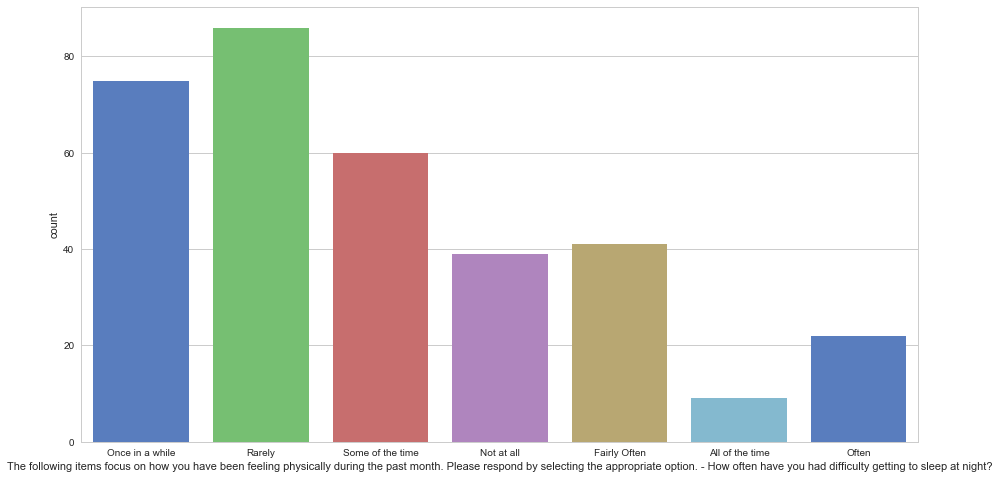

In [128]:
# order = 

fig, axes = plt.subplots(1, 0, figsize=(15, 8))

sns.countplot(x='The following items focus on how you have been feeling physically during the past month. Please respond by selecting the appropriate option. - How often have you had difficulty getting to sleep at night?', 
              data=sleep_subset, orient='h', palette='muted');

In [54]:
for col in pre_survey:
    counts = pre_survey[col].value_counts()
    print (col, ':')
    print (counts)
    pre_survey.plot.hist(col)

Location Latitude :
-23.57330322    12
37.7631073       7
47.14489746      4
37.74839783      4
1.285507202      4
37.65339661      3
51.29930115      3
22.29100037      3
40.41670227      3
44.86459351      3
41.38879395      3
45.46429443      3
4.598098755      3
39.73919678      2
44.43330383      2
51.04190063      2
-12.0677948      2
43.14790344      2
37.87260437      2
-27.47099304     2
32.77870178      2
42.26679993      2
52.38240051      2
38.86199951      2
41.38340759      2
37.67829895      2
48.19999695      2
59.90499878      2
42.4651947       2
49.21560669      2
                ..
55.66670227      1
44.71670532      1
17.73420715      1
46.56669617      1
46.17590332      1
37.66879272      1
45.4546051       1
-33              1
42.40539551      1
40.75650024      1
39.63839722      1
48.84480286      1
39.46980286      1
38.6927948       1
24.46670532      1
55.74850464      1
45.62010193      1
37.50790405      1
33.01980591      1
42.18899536      1
33.44839478

TypeError: Empty 'DataFrame': no numeric data to plot